In [67]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec            # to arrange the plots nicely
import pandas as pd
import math
from scipy.optimize import curve_fit

%matplotlib inline
plt.style.use('tableau-colorblind10')

In [68]:
#=====================================
# Load txt file to pandas dataframe
#=====================================
data_raw = pd.read_csv('adc.txt', sep='\s', names=['L00_ris1', 'R00_ris1', 'L10_ris1', 'R10_ris1', 'L20_ris1', 'R20_ris1', 'stuff', 'stuff', 'stuff', 'stuff', 'stuff', 'stuff', 'stuff', 'stuff', 'stuff', 'stuff', 'L00_ris2', 'R00_ris2', 'L10_ris2', 'R10_ris2', 'L20_ris2', 'R20_ris2', 'stuff', 'stuff', 'stuff', 'stuff', 'stuff', 'stuff', 'stuff', 'stuff', 'stuff', 'stuff', 'broken', 'broken'])

print('Total number of events:', len(data_raw))
data_raw.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


Total number of events: 54064


,L00_ris1,R00_ris1,L10_ris1,R10_ris1,L20_ris1,R20_ris1,stuff,stuff.1,stuff.2,stuff.3,...,stuff.12,stuff.13,stuff.14,stuff.15,stuff.16,stuff.17,stuff.18,stuff.19,broken,broken.1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
1,4095,4095,3712,4095,4041,4095,3715,4095,4095,4095,...,0,0,0,0,0,0,0,0,0,33
2,524,3928,403,3024,489,3667,655,4095,756,4095,...,53,402,53,401,52,397,52,395,0,33
3,524,3924,203,1524,523,3916,328,2461,530,3968,...,53,402,52,398,52,399,51,393,0,33
4,641,4095,385,2885,348,2612,455,3407,528,3957,...,53,402,52,400,53,400,51,394,0,33


In [69]:
# keeps only necessary

data_ris1 = data_raw[['L00_ris1', 'R00_ris1', 'L10_ris1', 'R10_ris1', 'L20_ris1', 'R20_ris1']]
data_ris1 = data_ris1.rename(columns={'L00_ris1':'L00', 'R00_ris1':'R00', 'L10_ris1':'L10', 'R10_ris1':'R10', 'L20_ris1':'L20', 'R20_ris1':'R20'})
data_ris2 = data_raw[['L00_ris2', 'R00_ris2', 'L10_ris2', 'R10_ris2', 'L20_ris2', 'R20_ris2']]
data_ris2 = data_ris2.rename(columns={'L00_ris2':'L00', 'R00_ris2':'R00', 'L10_ris2':'L10', 'R10_ris2':'R10', 'L20_ris2':'L20', 'R20_ris2':'R20'})

In [70]:
# convert function
def convert_to_pc (d, full_scale_pc, res):
    pc = d*full_scale_pc/res
    return pc

# landau

In [71]:
# make convertion
data_pc1 = convert_to_pc(data_ris1,650,4096)
data_pc1.head()
data_pc2 = convert_to_pc(data_ris2,650,4096)
data_pc2.head()

,L00,R00,L10,R10,L20,R20
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,9.362793,71.252441,8.569336,65.222168,9.521484,72.045898
3,9.362793,70.935059,8.569336,65.063477,9.521484,72.045898
4,9.204102,70.935059,8.569336,65.222168,9.521484,71.887207


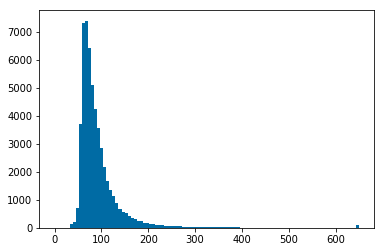

In [33]:
plt.hist(data_pc1['L00'], bins=100, label='L00_ris1')
plt.show()

In [ ]:
data_pc1['L00'].to_csv('energy.txt', index = False)

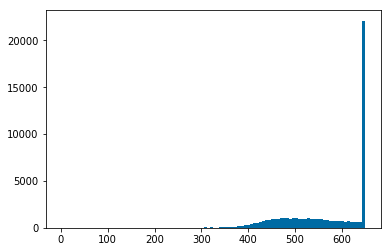

In [74]:
#data_pc1m=data_pc1[data_pc1['R00']<649.8]
plt.hist(data_pc1['R00'], bins=100, label='R00_ris1')
plt.show()

In [75]:
data_pc1['R00'].to_csv('energy_R00.txt', index = False)

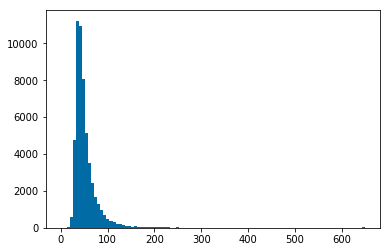

In [72]:
plt.hist(data_pc1['L10'], bins=100, label='L10_ris1')
plt.show()

In [73]:
data_pc1['L10'].to_csv('energy_L10.txt', index = False)

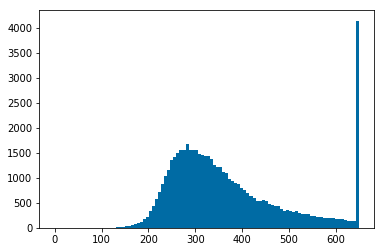

In [76]:
#data_pc1m=data_pc1[data_pc1['R10']<649.8]
plt.hist(data_pc1['R10'], bins=100, label='R10_ris1')
plt.show()

In [77]:
data_pc1['R10'].to_csv('energy_R10.txt', index = False)

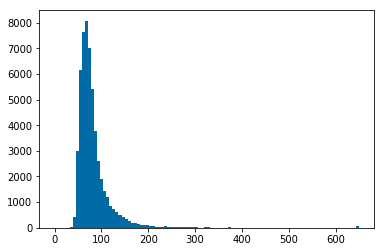

In [63]:
plt.hist(data_pc1['L20'], bins=100, label='L20_ris1')
plt.show()

In [64]:
data_pc1['L20'].to_csv('energy_L20.txt', index = False)

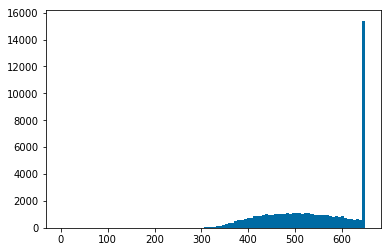

In [78]:
#data_pc1=data_pc1[data_pc1['R20']<649.8]
plt.hist(data_pc1['R20'], bins=100, label='R20_ris1')
plt.show()

In [79]:
data_pc1['R20'].to_csv('energy_R20.txt', index = False)